## 实现Softmax Regression识别手写数字

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

#### 导入数据

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('mnist_data/', one_hot=True)

Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


In [4]:
print(mnist.train.images.shape, mnist.train.labels.shape)
print(mnist.test.images.shape, mnist.test.labels.shape)
print(mnist.validation.images.shape, mnist.validation.labels.shape)

(55000, 784) (55000, 10)
(10000, 784) (10000, 10)
(5000, 784) (5000, 10)


瞅瞅我们的手写数据

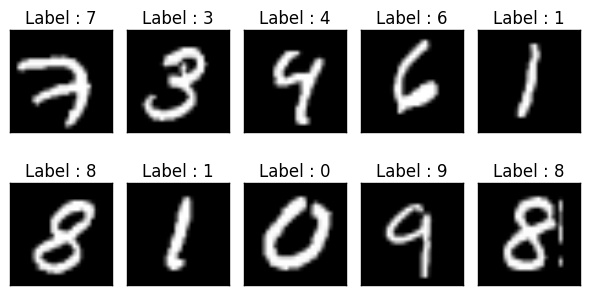

In [5]:
fig = plt.figure()
for index, (image, label) in enumerate(zip(mnist.train.images[:10], mnist.train.labels[:10])):
    image = image.reshape((28, 28))
    ax = fig.add_subplot(2, 5, index+1, xticks=[], yticks=[])
    ax.set_title('Label : %d' % np.argmax(label))
    ax.imshow(image, cmap=plt.cm.gray)
    plt.tight_layout()

#### 搭建模型

这次演示的是最简单的**softmax Regression**，其原理如下(Google 的图片= =)

结构图
<img src="./images/softmax_regression_graph.png" style="width:500px; height:200px; float:center">

数学原理
<img src="./images/softmax_regression_graph_1.png" style="width:500px; height:150px; float:center">

ok,那现在开始搭建模型了

先将一些前向计算变量定义好

In [6]:
sess = tf.InteractiveSession()

x = tf.placeholder(dtype=tf.float32, shape=[None, 784])
y_ = tf.placeholder(dtype=tf.float32, shape=[None, 10])

In [7]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [8]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

定义损失函数

公式如下：

$$H_{y_{true}}\left(y_{pred}\right) = -\sum_{i}{y_{true}\log{y_{pred}}}$$

一般来说，多分类问题使用最多的损失函数是**cross entropy**，这个东西有点牛逼，本来是信息论的东东，后来通信，博弈论，机器学习都用上了，厉害了[香农](https://zh.wikipedia.org/wiki/%E5%85%8B%E5%8A%B3%E5%BE%B7%C2%B7%E9%A6%99%E5%86%9C)

In [23]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), axis=1))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

定义accuracy

In [24]:
correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

开始训练啦

In [32]:
tf.global_variables_initializer().run()
for step in range(2001):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size=100)
    train_step.run(feed_dict={x: batch_xs, y_: batch_ys})
    if step % 100 == 0:
        print('After Step #%4d, accuray : %s' % (step, accuracy.eval(feed_dict={x: mnist.train.images, y_: mnist.train.labels})))

After Step #   0, accuray : 0.2138
After Step # 100, accuray : 0.888291
After Step # 200, accuray : 0.899673
After Step # 300, accuray : 0.901836
After Step # 400, accuray : 0.905473
After Step # 500, accuray : 0.910655
After Step # 600, accuray : 0.910545
After Step # 700, accuray : 0.912509
After Step # 800, accuray : 0.912709
After Step # 900, accuray : 0.915727
After Step #1000, accuray : 0.918527
After Step #1100, accuray : 0.915982
After Step #1200, accuray : 0.919218
After Step #1300, accuray : 0.920327
After Step #1400, accuray : 0.921473
After Step #1500, accuray : 0.921891
After Step #1600, accuray : 0.920745
After Step #1700, accuray : 0.920491
After Step #1800, accuray : 0.920345
After Step #1900, accuray : 0.921073
After Step #2000, accuray : 0.920236


In [33]:
accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})

0.9199

In [34]:
for image, label in zip(mnist.test.images[:20], mnist.test.labels[:20]):
    pred_label = np.argmax(sess.run(y, feed_dict={x: image.reshape(1, 784)}))
    actu_label = np.argmax(label)
    print('Actual label %d , Predict label %d' % (actu_label, pred_label))

Actual label 7 , Predict label 7
Actual label 2 , Predict label 2
Actual label 1 , Predict label 1
Actual label 0 , Predict label 0
Actual label 4 , Predict label 4
Actual label 1 , Predict label 1
Actual label 4 , Predict label 4
Actual label 9 , Predict label 9
Actual label 5 , Predict label 6
Actual label 9 , Predict label 9
Actual label 0 , Predict label 0
Actual label 6 , Predict label 6
Actual label 9 , Predict label 9
Actual label 0 , Predict label 0
Actual label 1 , Predict label 1
Actual label 5 , Predict label 5
Actual label 9 , Predict label 9
Actual label 7 , Predict label 7
Actual label 3 , Predict label 3
Actual label 4 , Predict label 4


ok,完工，softmax regression做到的最准确率差不多能够达到92%，还是不错滴。这里有一点需要注意的是，图片的结构信息被去除了，也有比较牛逼的模型是可以对图片结构信息学习的（比如CNN）。